# Open Source Libaries - Numpy and Matplotlib

Python is an excellent tool for mathematics and visualization. Much of this success comes from third-party scientific libraries, as Python's native types are actually fairly poorly suited for numerical computing. `numpy` corrects this deficiency by adding efficient vectorized data types and speedy functions to operate on them. `matplotlib` is a plotting library which creates all sorts of 2-D and 3-D plots and works well with `numpy`.

## Standard Math

The first feature of `numpy` we'll take a look at is its library of standard math functions. Note that you could import the same functions from the `math` module of the standard library, but we'll soon see that `numpy` gives us much more than the standard library.

In [1]:
import numpy as np # the numpy import is almost always abbreviated this way by convention

print(np.sqrt(2))
print(np.sin(0))
print(np.cos(0))
print()
print(np.exp(10)) # exponential function
print(np.log(10)) # natural log
print()
print(np.pi)
print(np.e)

1.4142135623730951
0.0
1.0

22026.465794806718
2.302585092994046

3.141592653589793
2.718281828459045


`numpy` also provides functions for random numbers. We'll look at two of the most commonly used ones, but there are many more random distributions and statistical functions available as well. You can confirm that these results are random by re-running the cell.

In [2]:
from numpy.random import random, randint

In [3]:
[random() for x in range(9)] # random floats in the range 0 to 1

[0.9420541026468117,
 0.2720236228906743,
 0.16761506037894203,
 0.7729883462474693,
 0.5018496568439095,
 0.047236334934145696,
 0.4871116964002741,
 0.8799576060579593,
 0.10047781877595163]

In [4]:
[randint(100) for x in range(9)] # random ints in the range 0 to 100

[23, 13, 48, 3, 18, 56, 35, 83, 12]

## Array Operations

One of the key features differentiating Python from most older languages is its lack of a native array type, opting instead for the more flexible `list` type. This enables many useful features such as automatic resizing, elegant `for...in` constructs, and list comprehensions. However, the `list` comes with trade-offs - one of the biggest being that it's very inefficient to iterate over large lists (which we probably want to do often in numerical computing.)

The solution numpy offers is to add an array type to Python. Like C-style arrays, a numpy array has a fixed size and a fixed data type (in this case, the data type was inferred automatically, but it is fixed regardless.

In [5]:
x_list = [x for x in range(9)] # a list, made with a list comprehension
x_array = np.arange(9)         # an array, made with numpy's range function
print(x_list, type(x_list))
print(x_array, type(x_array), x_array.dtype)

[0, 1, 2, 3, 4, 5, 6, 7, 8] <class 'list'>
[0 1 2 3 4 5 6 7 8] <class 'numpy.ndarray'> int64


Another key feature of numpy arrays is that they can represent matrices of any dimension. A one-dimensional array in numpy is just a matrix of dimension 1. Let's turn `x_array` into a 2-dimensional array by reshaping it. The shape of a matrix is represented by a tuple - so a tuple of length 2 represents a matrix of rank 2. The numpy array can represent a matrix of any rank.

In [6]:
x_array.shape

(9,)

In [7]:
x_matrix = x_array.reshape((3,3))
x_matrix

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [8]:
x_matrix.shape

(3, 3)

### Vectors and Matrices
One-dimensional numpy arrays are commonly used to represent vectors, and all the usual vector operations such as the dot product are included. More advanced matrix operations such determinants and eigenvalues live in the `numpy.linalg` module.

In [9]:
x = np.array([0.5, 0, 1])
y = np.array([2, 1, 1]) # two numpy arrays which represent vectors

In [10]:
np.dot(x, y) # a dot product (scalar output)

2.0

In [11]:
np.cross(x, y) # a cross product (vector output)

array([-1. ,  1.5,  0.5])

In [12]:
x_matrix

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [13]:
np.linalg.det(x_matrix) # matrix determinant

0.0

In [14]:
np.linalg.eig(x_matrix) # matrix eigenvalues and eigenvectors

EigResult(eigenvalues=array([ 1.33484692e+01, -1.34846923e+00, -1.17360548e-15]), eigenvectors=array([[ 0.16476382,  0.79969966,  0.40824829],
       [ 0.50577448,  0.10420579, -0.81649658],
       [ 0.84678513, -0.59128809,  0.40824829]]))

### Vectorized Functions
One of the nice features of using numpy arrays instead of Python lists is *vectorized functions*. You can input a numpy array into any standard math function, and it will automatically apply the operation to all elements. This saves you the trouble of looping over the array like you would do in standard Python.

In [15]:
x_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [16]:
x_array + x_array

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [17]:
x_array**2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])

In [18]:
np.exp(x_array)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03])

I made an assertion earlier that large lists are highly inefficient - let's test that now. Perhaps we want to run a simple function on a list of numbers. This is pretty easy with list comprehensions (which, under the hood, are just for loops.) Let's square every number in the list.

In [19]:
x_list = [x for x in range(10)]
x_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
[x**2 for x in x_list]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Not too bad, right? Now what if we wanted to do it for ten million numbers? The `timeit` module tells you the execution time of short snippets of code.

In [21]:
x_list = [x for x in range(10_000_000)] # a standard list
x_array = np.arange(10_000_000) # a numpy array

In [22]:
from timeit import timeit
timeit('y = [x**2 for x in x_list]', number=1, globals=globals())

2.2111258750000005

In [23]:
timeit('y = x_array**2', number=1, globals=globals())

0.020459083999995187

We find that the vectorized function is about an order of magnitude faster than the list comprehension! In general, it's not going to be a good idea to loop over numpy arrays - we use vectorized functions whenever we can.

## Plotting with [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

`matplotlib` is a powerful general-purpose plotting library for numerical and scientific computing. It's capable of generating many different sorts of plots in two or three dimensions, with all the labels, widgets, and legends you'd need. It's even capable of generating animated and interactive plots. For now, we'll show a basic example of a 2-d plot. We'll cover plotting in more detail during the data science portion of the course.

In [24]:
x = np.linspace(0, np.pi, 100) # make an array of 100 values from [0,pi]
y1 = np.sin(3*x)
y2 = np.exp(0.5*x)

In [25]:
x

array([0.        , 0.03173326, 0.06346652, 0.09519978, 0.12693304,
       0.1586663 , 0.19039955, 0.22213281, 0.25386607, 0.28559933,
       0.31733259, 0.34906585, 0.38079911, 0.41253237, 0.44426563,
       0.47599889, 0.50773215, 0.53946541, 0.57119866, 0.60293192,
       0.63466518, 0.66639844, 0.6981317 , 0.72986496, 0.76159822,
       0.79333148, 0.82506474, 0.856798  , 0.88853126, 0.92026451,
       0.95199777, 0.98373103, 1.01546429, 1.04719755, 1.07893081,
       1.11066407, 1.14239733, 1.17413059, 1.20586385, 1.23759711,
       1.26933037, 1.30106362, 1.33279688, 1.36453014, 1.3962634 ,
       1.42799666, 1.45972992, 1.49146318, 1.52319644, 1.5549297 ,
       1.58666296, 1.61839622, 1.65012947, 1.68186273, 1.71359599,
       1.74532925, 1.77706251, 1.80879577, 1.84052903, 1.87226229,
       1.90399555, 1.93572881, 1.96746207, 1.99919533, 2.03092858,
       2.06266184, 2.0943951 , 2.12612836, 2.15786162, 2.18959488,
       2.22132814, 2.2530614 , 2.28479466, 2.31652792, 2.34826

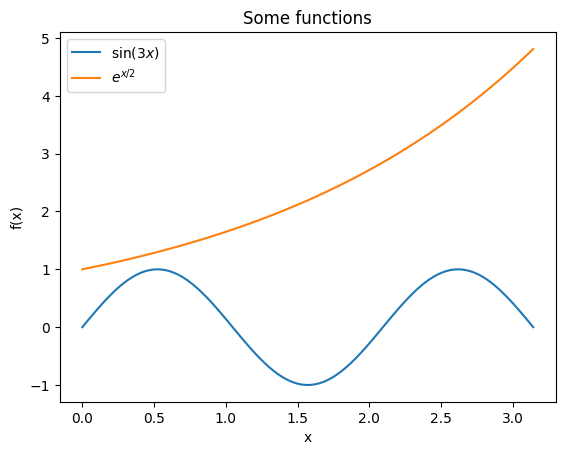

In [26]:
import matplotlib.pyplot as plt # another common abbreviation here

plt.plot(x, y1, label=r'$\sin(3x)$')
plt.plot(x, y2, label=r'$e^{x/2}}$')
plt.title('Some functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()